## Model Comparions of Various Classifiers

In [9]:
# here we will impor the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline

from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split,GridSearchCV  # to split the data into two parts
from sklearn.model_selection import KFold, cross_val_score  # use for K- fold cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score,average_precision_score, precision_score, confusion_matrix, classification_report

In [10]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  #
import seaborn as sns  #
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score,confusion_matrix, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [24]:
dataset = pd.read_csv('data.csv')
dataset.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [25]:
# Creating a Binary Target Column to allow us to do Later Modelling and Plotting

dataset['Target'] = dataset['diagnosis'].map({'B':0, 'M':1})

In [26]:
dataset=dataset.drop(['id','Unnamed: 32'], axis=1)
dataset.columns

Index([u'diagnosis', u'radius_mean', u'texture_mean', u'perimeter_mean',
       u'area_mean', u'smoothness_mean', u'compactness_mean',
       u'concavity_mean', u'concave points_mean', u'symmetry_mean',
       u'fractal_dimension_mean', u'radius_se', u'texture_se', u'perimeter_se',
       u'area_se', u'smoothness_se', u'compactness_se', u'concavity_se',
       u'concave points_se', u'symmetry_se', u'fractal_dimension_se',
       u'radius_worst', u'texture_worst', u'perimeter_worst', u'area_worst',
       u'smoothness_worst', u'compactness_worst', u'concavity_worst',
       u'concave points_worst', u'symmetry_worst', u'fractal_dimension_worst',
       u'Target'],
      dtype='object')

### Checking Missing Values

In [85]:
for c in dataset:
    no_missing = dataset[c].isnull().sum()
    if no_missing > 0:
        print(c)
        print(no_missing)
    else:
        print(c)
        print("No missing values")
        print(' ')

diagnosis
No missing values
 
radius_mean
No missing values
 
texture_mean
No missing values
 
perimeter_mean
No missing values
 
area_mean
No missing values
 
smoothness_mean
No missing values
 
compactness_mean
No missing values
 
concavity_mean
No missing values
 
concave points_mean
No missing values
 
symmetry_mean
No missing values
 
fractal_dimension_mean
No missing values
 
radius_se
No missing values
 
texture_se
No missing values
 
perimeter_se
No missing values
 
area_se
No missing values
 
smoothness_se
No missing values
 
compactness_se
No missing values
 
concavity_se
No missing values
 
concave points_se
No missing values
 
symmetry_se
No missing values
 
fractal_dimension_se
No missing values
 
radius_worst
No missing values
 
texture_worst
No missing values
 
perimeter_worst
No missing values
 
area_worst
No missing values
 
smoothness_worst
No missing values
 
compactness_worst
No missing values
 
concavity_worst
No missing values
 
concave points_worst
No missing val

## Features Correlation

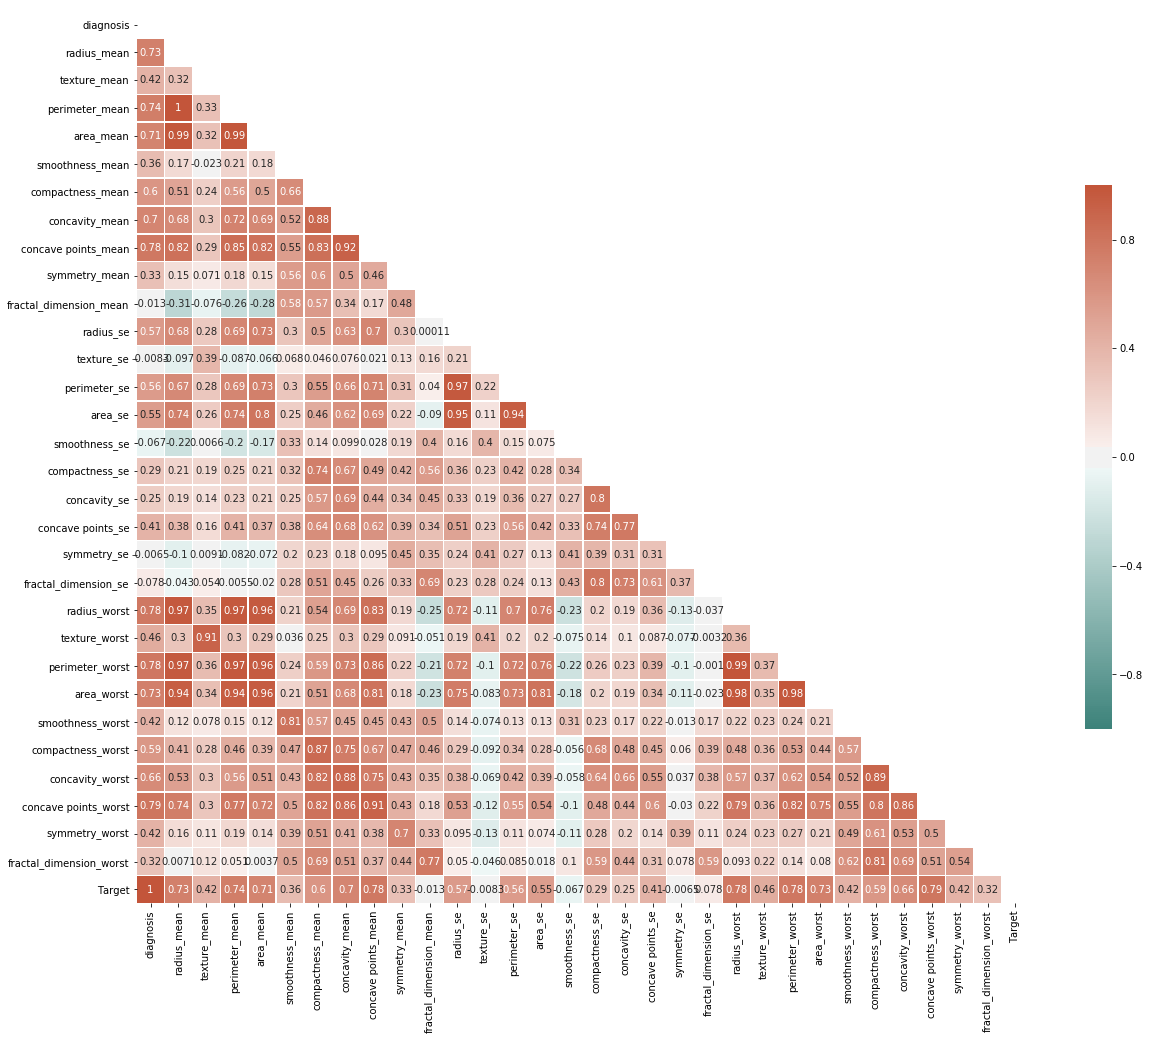

In [86]:
correlation = dataset.corr()

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(180, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [87]:
X_corr = dataset[['smoothness_mean', 'radius_se', 'texture_se', 'smoothness_se', 'symmetry_se', 
                       'fractal_dimension_se', 'texture_worst', 'symmetry_worst','fractal_dimension_worst']]
y_corr = dataset['diagnosis']

One of the data set's hallmarks is relatively high correlation coefficient score - only score no higher than 0.6 will be considered acceptable.

Correlation not necceserily means causation, that is why features will not be exluded only for their low correlation with diagnosis (in the heatmap below diagnosis skipped).

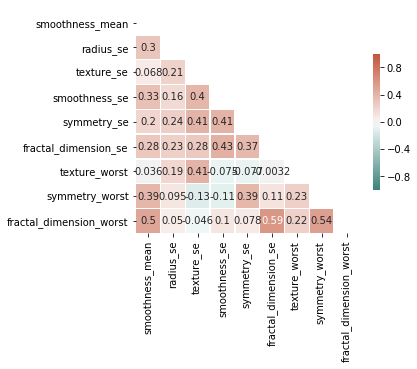

In [89]:
correlation = X_corr.corr()

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(5, 5))

cmap = sns.diverging_palette(180, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.34)

## Comparison of the Models After Features Correlation

In [138]:
models_correlation = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_correlation.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
3,Linear Discriminant Analysis,0.005080,0.003778,0.947091,0.957521,0.936418,0.946023,0.990564
4,Quadratic Discriminant Analysis,0.001464,0.004210,0.946959,0.951891,0.942397,0.946156,0.984957
0,Logistic Regression,0.003192,0.003742,0.946257,0.950846,0.941572,0.945932,0.990902
5,Random Forest,0.023106,0.008932,0.933480,0.943767,0.923688,0.932342,0.975426
1,Decision Tree,0.002212,0.003873,0.930848,0.935688,0.924986,0.930255,0.924986
6,K-Nearest Neighbors,0.000894,0.006285,0.930292,0.934713,0.924675,0.929672,0.947656
7,Bayes,0.001137,0.004225,0.923216,0.935303,0.909700,0.920906,0.976454
2,Support Vector Machine,0.031098,0.005019,0.610848,0.305424,0.500000,0.463325,0.868584


Features to be included: 'smoothness_mean', 'radius_se', 'texture_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_se', 'texture_worst', 'symmetry_worst', 'fractal_dimension_worst'.

## Binarizing (Bucketing the Dataset)

In [27]:
# Fitting a Label Binarizer
# By default Majority Class (Benign) will be Negative

from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
dataset['diagnosis'] = lb.fit_transform(dataset['diagnosis'].values)
targets = dataset['diagnosis']

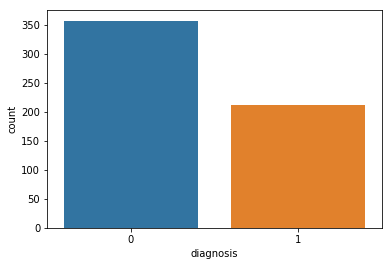

In [58]:

sns.countplot(dataset['diagnosis'],label="Sum")

plt.show()

# Model Building 

In [28]:
X= dataset.drop(['diagnosis', 'Target'] ,axis=1)
y= dataset['Target']

In [29]:
# Splitting the Dataset into  80 % Train and  20% Test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,stratify=targets, random_state=123)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

('Train set:', (455, 30), (455,))
('Test set:', (114, 30), (114,))


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Logistic Regression Classifier

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        72
           1       0.93      0.93      0.93        42

   micro avg       0.95      0.95      0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



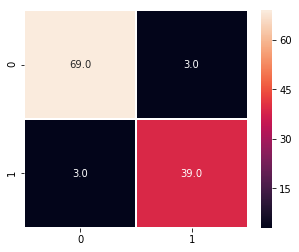

In [35]:
#Create the model
modelo_rl= LogisticRegression()

#Fit the model
modelo_rl.fit(X=X_train,y=y_train)

#Prediction
predicion_rl = modelo_rl.predict(X_test)

#Results:

#Clasification report
results_rl=metrics.classification_report(y_true=y_test, y_pred=predicion_rl)
print(results_rl)

#Confusion matrix
cm_rl=metrics.confusion_matrix(y_true=y_test, y_pred=predicion_rl)
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_rl, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

## Decision Trees Classifier 

              precision    recall  f1-score   support

           0       0.96      0.89      0.92        72
           1       0.83      0.93      0.88        42

   micro avg       0.90      0.90      0.90       114
   macro avg       0.89      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114



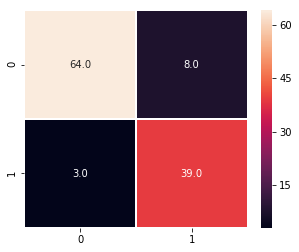

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Create the model
modelo_ad= DecisionTreeClassifier()
# Fit the model
modelo_ad.fit(X=X_train,y=y_train)


# Prediction
predicion_ad = modelo_ad.predict(X_test)


#Results:

#Clasification report
results_ad=metrics.classification_report(y_true=y_test, y_pred=predicion_ad)
print(results_ad)

#Confusion Matrix
cm_ad=metrics.confusion_matrix(y_true=y_test, y_pred=predicion_ad)
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_ad, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

## Random Forest Classifier 

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        72
           1       0.93      0.98      0.95        42

   micro avg       0.96      0.96      0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



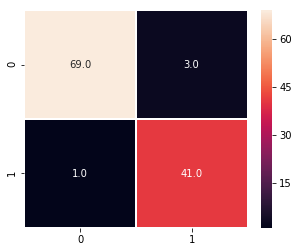

In [39]:
from sklearn.ensemble import RandomForestClassifier

#Create the model
modelo_rf= RandomForestClassifier()

#Fit the model
modelo_rf.fit(X=X_train,y=y_train)

predicion_rf = modelo_rf.predict(X_test)


results_rf=metrics.classification_report(y_true=y_test, y_pred=predicion_rf)
print(results_rf)

#Confusion matrix
cm_rf=metrics.confusion_matrix(y_true=y_test, y_pred=predicion_rf)
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

## Naives Bayes Classifier

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        72
           1       0.85      0.95      0.90        42

   micro avg       0.92      0.92      0.92       114
   macro avg       0.91      0.93      0.92       114
weighted avg       0.93      0.92      0.92       114



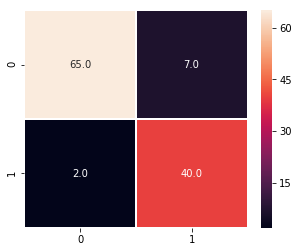

In [41]:
from sklearn.naive_bayes import GaussianNB

# Create the model
modelo_NB= GaussianNB()

# Fit the model
modelo_NB.fit(X=X_train,y=y_train)

#Prediction
predicion_NB = modelo_NB.predict(X_test)
#Results

#Clasification report
results_NB=metrics.classification_report(y_true=y_test, y_pred=predicion_NB)
print(results_NB)

#Confusion Matrix
cm_NB=metrics.confusion_matrix(y_true=y_test, y_pred=predicion_NB)
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_NB, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

##  Support Vector Machine Classifier

In [46]:
from sklearn.svm import SVC
modelo_svm= SVC(kernel='linear', C = 1.0)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97        72
           1       0.93      0.95      0.94        42

   micro avg       0.96      0.96      0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



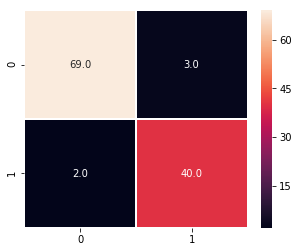

In [49]:
modelo_svm.fit(X=X_train,y=y_train)

predicion_svm = modelo_svm.predict(X_test)

results_svm=metrics.classification_report(y_true=y_test, y_pred=predicion_svm)
print(results_svm)

#Confusion matrix
cm_svm=metrics.confusion_matrix(y_true=y_test, y_pred=predicion_svm)
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_svm, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

## K- Nearest Neighbour Classifier 

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

   micro avg       0.95      0.95      0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



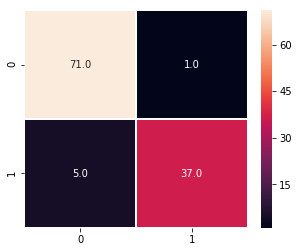

In [52]:
from sklearn.neighbors import KNeighborsClassifier

# Create the model
modelo_knn= KNeighborsClassifier(n_neighbors=10)

# Fit the model
modelo_knn.fit(X=X_train,y=y_train)

# Prediction
predicion_knn = modelo_knn.predict(X_test)


# Results:

# Clasification report
results_knn=metrics.classification_report(y_true=y_test, y_pred=predicion_knn)
print(results_knn)

# Confusion matrix
cm_knn= metrics.confusion_matrix(y_true=y_test, y_pred=predicion_knn)
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

## Plotting the Confusion Matrix for the Various Classifiers

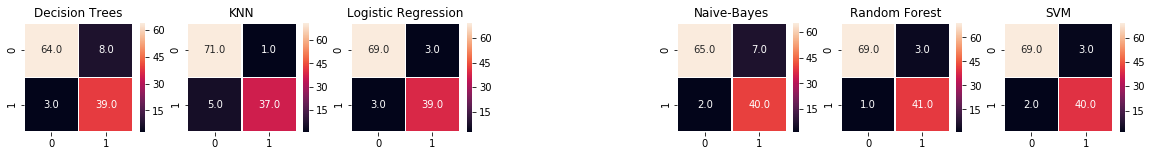

In [57]:
f,ax = plt.subplots(figsize=(20, 2))
plt.subplot(1,7,1)
plt.title('Decision Trees')
sns.heatmap(cm_ad, annot=True, linewidths=.5, fmt= '.1f')

plt.subplot(1,7,2)
plt.title('KNN')
sns.heatmap(cm_knn, annot=True, linewidths=.5, fmt= '.1f')

plt.subplot(1,7,3)
plt.title('Logistic Regression')
sns.heatmap(cm_rl, annot=True, linewidths=.5, fmt= '.1f')


plt.subplot(1,7,5)
plt.title('Naive-Bayes')
sns.heatmap(cm_NB, annot=True, linewidths=.5, fmt= '.1f')

plt.subplot(1,7,6)
plt.title('Random Forest')
sns.heatmap(cm_rf, annot=True, linewidths=.5, fmt= '.1f')

plt.subplot(1,7,7)
plt.title('SVM')
sns.heatmap(cm_svm, annot=True, linewidths=.5, fmt= '.1f')

# Advanced Modelling and Comparsion of Various Classifiers

#### Classifiers:

Logistic Regression

Decision Tree

Support Vector Machine

Linear Discriminant Analysis

Quadratic Discriminant Analysis

Random Forest

K-Nearest Neighbors

Naive Bayes

### Scoring:

precision score

recall score

F1 score

support score

accuracy score

AUC/ROC

In [60]:
from sklearn.model_selection import cross_validate

## Logistic Regression Classifier

In [61]:
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

## Decision Tree Classifier

In [62]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

##  Support Vector Machine  Classifier

In [63]:
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

## Linear Discriminant Analysis 

In [66]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV

In [67]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

## Quadratic Discriminant Analysis

In [73]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

## Random Forest Classifier

In [68]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

## K Nearest Neigbour Classifier

In [69]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

## Naives Bayes Classifier

In [70]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

## Comparsion of the various Classifiers

In [74]:
models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_initial.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
3,Linear Discriminant Analysis,0.016343,0.006911,0.958918,0.971042,0.945139,0.957430,0.992758
4,Quadratic Discriminant Analysis,0.003779,0.007669,0.958539,0.958532,0.954474,0.958446,0.991372
0,Logistic Regression,0.007551,0.007043,0.954562,0.957912,0.949266,0.954021,0.992034
5,Random Forest,0.031390,0.012404,0.952404,0.956143,0.945605,0.951717,0.984678
7,Bayes,0.002528,0.007306,0.936792,0.942249,0.927450,0.935393,0.987303
6,K-Nearest Neighbors,0.002321,0.010058,0.932625,0.936539,0.922312,0.931751,0.963509
1,Decision Tree,0.007619,0.006602,0.914723,0.914570,0.914157,0.914269,0.914157
2,Support Vector Machine,0.068377,0.009871,0.626606,0.313303,0.500000,0.482826,0.918527


## The Voting Classifier Ensemble Methods

### Voting classifier 
Documentation: If ‘hard’, uses predicted class labels for majority rule voting. Else if ‘soft’, predicts the class label based on the argmax of the sums of the predicted probabilities, which is recommended for an ensemble of well-calibrated classifiers.

In [75]:
models = [LogisticRegression(),
         DecisionTreeClassifier(),
         SVC(probability = True),
         LinearDiscriminantAnalysis(),
         QuadraticDiscriminantAnalysis(),
         RandomForestClassifier(),
         KNeighborsClassifier(),
         GaussianNB()]

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.34)

In [77]:
for model in models:
    scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=20)
    #print(model, scores['fit_time'].mean(), scores['score_time'].mean(), scores['test_accuracy'].mean(),
          #scores['test_precision_macro'].mean(), scores['test_recall_macro'].mean(), 
          #scores['test_f1_weighted'].mean(), scores['test_roc_auc'].mean())

## Hard Voting Classifier

In [78]:
models_ens = list(zip(['LR', 'DT', 'SVM', 'LDA', 'QDA', 'RF', 'KNN', 'NB'], models))

model_ens = VotingClassifier(estimators = models_ens, voting = 'hard')
model_ens.fit(X_train, y_train)
pred = model_ens.predict(X_test)
#prob = model_ens.predict_proba(X_test)[:,1]

acc_hard = accuracy_score(y_test, pred)
prec_hard = precision_score(y_test, pred)
recall_hard = recall_score(y_test, pred)
f1_hard = f1_score(y_test, pred)
roc_auc_hard = 'not applicable'

## Soft Voting Classifier

In [79]:
model_ens = VotingClassifier(estimators = models_ens, voting = 'soft')
model_ens.fit(X_train, y_train)
pred = model_ens.predict(X_test)
prob = model_ens.predict_proba(X_test)[:,1]

acc_soft = accuracy_score(y_test, pred)
prec_soft = precision_score(y_test, pred)
recall_soft = recall_score(y_test, pred)
f1_soft = f1_score(y_test, pred)
roc_auc_soft = roc_auc_score(y_test, prob)

## Comparison of the Hard and Soft Voting Classifier 

In [80]:
models_ensembling = pd.DataFrame({
    'Model'       : ['Ensebling_hard', 'Ensembling_soft'],
    'Accuracy'    : [acc_hard, acc_soft],
    'Precision'   : [prec_hard, prec_soft],
    'Recall'      : [recall_hard, recall_soft],
    'F1_score'    : [f1_hard, f1_soft],
    'AUC_ROC'     : [roc_auc_hard, roc_auc_soft],
    }, columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_ensembling.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1_score,AUC_ROC
0,Ensebling_hard,0.958763,0.986111,0.910256,0.946667,not applicable
1,Ensembling_soft,0.958763,0.986111,0.910256,0.946667,0.997458


## Plotting the Confusion Matrix for the Various Classifiers

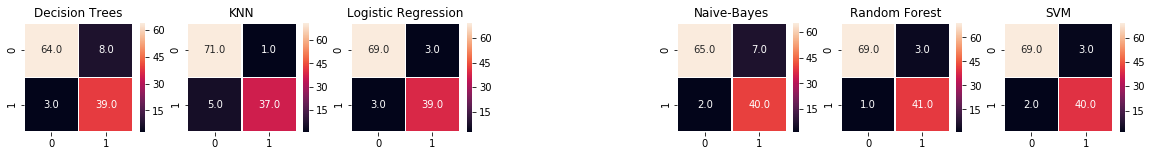

In [83]:
f,ax = plt.subplots(figsize=(20, 2))
plt.subplot(1,7,1)
plt.title('Decision Trees')
sns.heatmap(cm_ad, annot=True, linewidths=.5, fmt= '.1f')

plt.subplot(1,7,2)
plt.title('KNN')
sns.heatmap(cm_knn, annot=True, linewidths=.5, fmt= '.1f')

plt.subplot(1,7,3)
plt.title('Logistic Regression')
sns.heatmap(cm_rl, annot=True, linewidths=.5, fmt= '.1f')


plt.subplot(1,7,5)
plt.title('Naive-Bayes')
sns.heatmap(cm_NB, annot=True, linewidths=.5, fmt= '.1f')

plt.subplot(1,7,6)
plt.title('Random Forest')
sns.heatmap(cm_rf, annot=True, linewidths=.5, fmt= '.1f')

plt.subplot(1,7,7)
plt.title('SVM')
sns.heatmap(cm_svm, annot=True, linewidths=.5, fmt= '.1f')

# Recursive Feature Elimination through RFECV

# Linear SVC + RFECV 

From documentation: Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. RFECV performs RFE in a cross-validation loop to find the optimal number of features.

In [93]:
lsvc = LinearSVC(C=0.05, penalty="l1", dual=False)
model = RFECV(estimator=lsvc, step=1, cv=20).fit(X,y)
X_rfecv = model.transform(X)
X_rfecv.shape #reduction from 30

(569, 8)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_rfecv,y,test_size=0.34)

In [94]:
# Logistic Regression

LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

In [95]:
# Decision Tree Classifier

decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

In [96]:
# Support Vector Machine

SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

In [97]:
# Linear Discriminant Analysis

LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

In [98]:
# Quadratic Discriminant Analysis

QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()


In [99]:
# Random Forest Classifier

random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

In [100]:
# K-Nearest Neighbors

KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()


In [101]:
# Naive Bayes Classifier

bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

# Comparison of the Models after RFE

In [102]:

models_rfecv = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_rfecv.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
5,Random Forest,0.024336,0.009233,0.959761,0.963844,0.951596,0.959141,0.988041
3,Linear Discriminant Analysis,0.002350,0.003693,0.949088,0.960462,0.935038,0.947449,0.990314
4,Quadratic Discriminant Analysis,0.001577,0.004245,0.948779,0.950842,0.942478,0.948502,0.991739
7,Bayes,0.001177,0.004273,0.940901,0.944050,0.931169,0.940296,0.987635
0,Logistic Regression,0.004002,0.003780,0.935784,0.939086,0.927597,0.934762,0.988492
1,Decision Tree,0.003126,0.003828,0.924785,0.934228,0.914015,0.923255,0.914015
6,K-Nearest Neighbors,0.000976,0.006510,0.915187,0.917950,0.904275,0.913993,0.956944
2,Support Vector Machine,0.038420,0.005504,0.637616,0.318808,0.500000,0.496592,0.921456


# Tree Based Feature Selection 

## Tree-based feature selection 

Documentation: Tree-based estimators (see the sklearn.tree module and forest of trees in the sklearn.ensemble module) can be used to compute feature importances, which in turn can be used to discard irrelevant features (when coupled with the sklearn.feature_selection.SelectFromModel meta-transformer)

In [103]:
lsvc = LinearSVC(C=0.05, penalty="l1", dual=False).fit(X, y)
etc = ExtraTreesClassifier()
etc.fit(X, y)

model = SelectFromModel(etc, prefit=True)
X_etc = model.transform(X)
X_etc.shape 

(569, 9)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.34)

In [107]:
## Logistic Regression

LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

In [106]:
## Decision Tree

decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

In [109]:
## Support Vector Machine

SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

In [110]:
## Linear Discriminant Analysis

LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

In [112]:
## Quadratic Discriminant Analysis

QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

In [113]:
## Random Forest Classifier

random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

In [114]:
## K-Nearest Neighbors

KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

In [115]:
## Naive Bayes

bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

## Comparison of the Classifiers after Tree Based Feature Selection

In [116]:
models_tree = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_tree.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
5,Random Forest,0.025615,0.012226,0.961464,0.964973,0.953193,0.960380,0.977165
4,Quadratic Discriminant Analysis,0.004094,0.007488,0.951247,0.950831,0.947348,0.951246,0.986427
0,Logistic Regression,0.006421,0.006963,0.945055,0.947257,0.936932,0.944606,0.986472
3,Linear Discriminant Analysis,0.004072,0.007036,0.943662,0.956372,0.926001,0.942022,0.991450
7,Bayes,0.002483,0.007345,0.930358,0.935169,0.917965,0.928902,0.978436
1,Decision Tree,0.006091,0.006773,0.927253,0.928436,0.922646,0.926992,0.922646
6,K-Nearest Neighbors,0.002299,0.009899,0.924785,0.926287,0.915693,0.924035,0.961264
2,Support Vector Machine,0.047564,0.009225,0.634881,0.317441,0.500000,0.493127,0.952083


# Linear SVC + Select From Model

## Linear SVC + SelectFromModel 
Documentation: Linear models penalized with the L1 norm have sparse solutions: many of their estimated coefficients are zero. When the goal is to reduce the dimensionality of the data to use with another classifier, they can be used along with feature_selection.

SelectFromModel to select the non-zero coefficients. In particular, sparse estimators useful for this purpose are the linear_model.Lasso for regression, and of linear_model.LogisticRegression and svm.LinearSVC for classification.

In [118]:
X.shape

(569, 30)

In [119]:
lsvc = LinearSVC(C=0.05, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_svc = model.transform(X)
X_svc.shape #reduction from 30 to 10 features


(569, 10)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X_svc,y,test_size=0.34)

In [121]:
## Decision Tree
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

In [122]:
## Decision Tree
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

In [123]:
## Support Vector Machine
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

In [124]:
## Linear Discriminant Analysis

LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

In [125]:
## Quadratic Discriminant Analysis

QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

In [127]:
## Random Forest Classifier
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

In [128]:
## K-Nearest Neighbors

KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

In [132]:
## Naive Bayes
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

## Comparison fo the Models After Linear SVC + SelectFromModel

In [133]:

models_sfm = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_sfm.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
3,Linear Discriminant Analysis,0.005080,0.003778,0.947091,0.957521,0.936418,0.946023,0.990564
4,Quadratic Discriminant Analysis,0.001464,0.004210,0.946959,0.951891,0.942397,0.946156,0.984957
0,Logistic Regression,0.003192,0.003742,0.946257,0.950846,0.941572,0.945932,0.990902
5,Random Forest,0.023106,0.008932,0.933480,0.943767,0.923688,0.932342,0.975426
1,Decision Tree,0.002212,0.003873,0.930848,0.935688,0.924986,0.930255,0.924986
6,K-Nearest Neighbors,0.000894,0.006285,0.930292,0.934713,0.924675,0.929672,0.947656
7,Bayes,0.001137,0.004225,0.923216,0.935303,0.909700,0.920906,0.976454
2,Support Vector Machine,0.031098,0.005019,0.610848,0.305424,0.500000,0.463325,0.868584


# Comparison of the Models After Feature Correlation

In [139]:
models_correlation = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_correlation.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
3,Linear Discriminant Analysis,0.005080,0.003778,0.947091,0.957521,0.936418,0.946023,0.990564
4,Quadratic Discriminant Analysis,0.001464,0.004210,0.946959,0.951891,0.942397,0.946156,0.984957
0,Logistic Regression,0.003192,0.003742,0.946257,0.950846,0.941572,0.945932,0.990902
5,Random Forest,0.023106,0.008932,0.933480,0.943767,0.923688,0.932342,0.975426
1,Decision Tree,0.002212,0.003873,0.930848,0.935688,0.924986,0.930255,0.924986
6,K-Nearest Neighbors,0.000894,0.006285,0.930292,0.934713,0.924675,0.929672,0.947656
7,Bayes,0.001137,0.004225,0.923216,0.935303,0.909700,0.920906,0.976454
2,Support Vector Machine,0.031098,0.005019,0.610848,0.305424,0.500000,0.463325,0.868584


## General Comparison of the Models 

In [136]:
model_general = pd.concat([models_initial['Model'], models_initial['Accuracy'], 
                           models_correlation['Model'],models_correlation['Accuracy'],
                          models_sfm['Model'], models_sfm['Accuracy'],
                          models_rfecv['Model'], models_rfecv['Accuracy'],
                          models_tree['Model'], models_tree['Accuracy'],
                          models_ensembling['Model'], models_ensembling['Accuracy']]
                          , axis=1)

model_general.columns = ['W/out reduction', 'Accuracy', 'Correlation', 'Accuracy_corr',
                        'Linear+SFM', 'Accuracy_sfm', 'Linear+RFECV', 'Accuracy_RFECV', 'Extra trees',
                         'Accuracy_trees', 'Voting', 'Accuracy_voting']

model_general.sort_values(by='Accuracy', ascending=False)

,W/out reduction,Accuracy,Correlation,Accuracy_corr,Linear+SFM,Accuracy_sfm,Linear+RFECV,Accuracy_RFECV,Extra trees,Accuracy_trees,Voting,Accuracy_voting
3,Linear Discriminant Analysis,0.958918,Linear Discriminant Analysis,0.947091,Linear Discriminant Analysis,0.947091,Linear Discriminant Analysis,0.949088,Linear Discriminant Analysis,0.943662,NaN,NaN
4,Quadratic Discriminant Analysis,0.958539,Quadratic Discriminant Analysis,0.946959,Quadratic Discriminant Analysis,0.946959,Quadratic Discriminant Analysis,0.948779,Quadratic Discriminant Analysis,0.951247,NaN,NaN
0,Logistic Regression,0.954562,Logistic Regression,0.946257,Logistic Regression,0.946257,Logistic Regression,0.935784,Logistic Regression,0.945055,Ensebling_hard,0.958763
5,Random Forest,0.952404,Random Forest,0.933480,Random Forest,0.933480,Random Forest,0.959761,Random Forest,0.961464,NaN,NaN
7,Bayes,0.936792,Bayes,0.923216,Bayes,0.923216,Bayes,0.940901,Bayes,0.930358,NaN,NaN
6,K-Nearest Neighbors,0.932625,K-Nearest Neighbors,0.930292,K-Nearest Neighbors,0.930292,K-Nearest Neighbors,0.915187,K-Nearest Neighbors,0.924785,NaN,NaN
1,Decision Tree,0.914723,Decision Tree,0.930848,Decision Tree,0.930848,Decision Tree,0.924785,Decision Tree,0.927253,Ensembling_soft,0.958763
2,Support Vector Machine,0.626606,Support Vector Machine,0.610848,Support Vector Machine,0.610848,Support Vector Machine,0.637616,Support Vector Machine,0.634881,NaN,NaN
